# Pràctica 1C: Anàlisi de les dades

En aquesta primera peça de codi s'importen totes les llibreries necessàries, hi apliquem certes opcions i carreguem el nostre dataset en forma d'array pandas.

In [78]:
# -*- coding: utf-8 -*-

from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sb
%matplotlib notebook
from sklearn.linear_model import LinearRegression

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = pd.read_csv('bike-sharing-dataset/hour.csv', header=0, delimiter=',')


#Omplim
dataset = dataset.fillna(dataset.mean())

data = dataset.values

x = data[:, 2:16]
y = data[:, 16]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)


Dimensionalitat de la BBDD: (17379, 17)
Dimensionalitat de les entrades X (17379, 14)
Dimensionalitat de l'atribut Y (17379,)


In [71]:
print("5 Primeres mostres de la BBDD:")
dataset.head()

5 Primeres mostres de la BBDD:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


In [72]:
print("Estadistiques dels atributs numerics de la BBDD:")
dataset.describe()

Estadistiques dels atributs numerics de la BBDD:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


#### Aquest primer apartat té com a objectiu respondre les següents preguntes:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?


#### Mirem la correlació entre els atributs d'entrada per entendre millor les dades

<IPython.core.display.Javascript object>


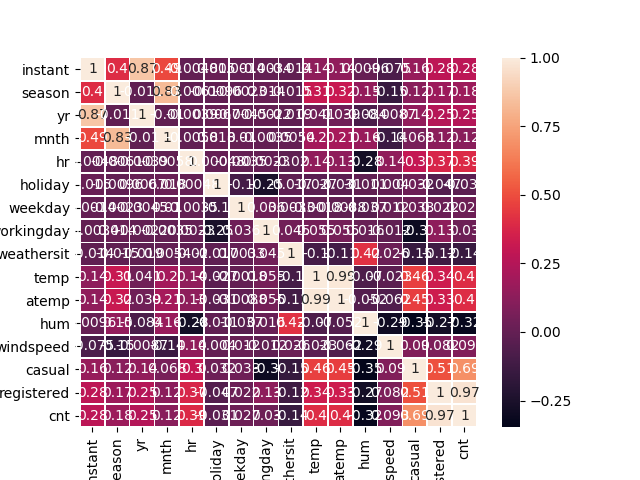

In [73]:
correlacio = dataset.corr()

plt.figure()

ax = sb.heatmap(correlacio, annot=True, linewidths=.5)

<IPython.core.display.Javascript object>


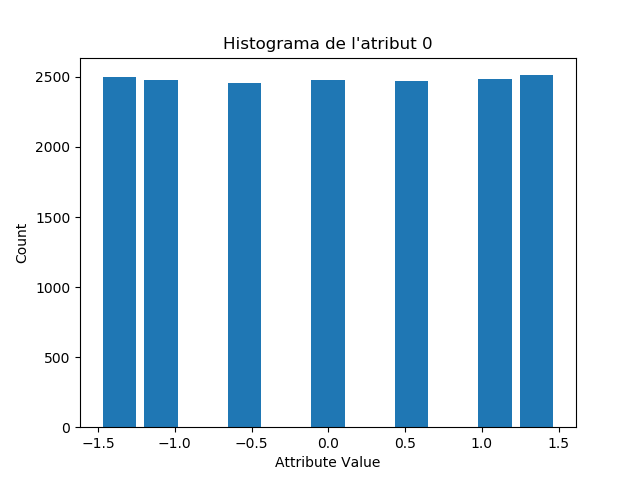

In [100]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_t[:,5], bins=11, range=[np.min(x_t[:,5]), np.max(x_t[:,5])], histtype="bar", rwidth=0.8)

Creem la funció standarize, que mitjançant procediments de normalització, modifica tots els atributs del dataset, per identificar els valors que tinguin distribució normal, millors per fer regressió, i descartar els que no siguin representatius.
Per visualitzar la millora que suposarà normalitzar les dades, calcularem el mean squared error per a la regressió aplicada directament sobre el dataset i per a la regressió després de normalitzar els atributs.

# El codi sembla que només fa la normalització de les dades perquè totes estiguin al mateix ordre, el descartar els no representatius ho hem de fer nosaltres. SEMBLA, NO EM DÓNA TEMPS A MIRAR-HO. Caldria, doncs, analitzar primer les dades amb l'histograma de la box anterior (ara està el 5 perquè he estat provant) i el heatmap. De primeres ja he tret l'ID i la data (perquè està com un string i petava al fer la mitjana), però potser caldria analitzar i treure'n d'altres. Potser buscar altres millores? Ara mateix, fins i tot amb les dades passades per l'standarize el mse és gegant. Tot s'ha de dir que dóna el mateix als dos i això em fa sospitar que també s'hagi de passar la y per l'standarize (o alguna altra solució). 
# Un cop solucionat això, faltarà dividir les dades en train, validation i test i fer els fors per provar els diferents valors dels atributs (editar el codi que ja hi ha al jupyter del profe) 
# i finalment respondre a les preguntes, que això ja ho faria junts, si et corones i acabes el que t'he dit demà al matí

In [101]:
x = np.array(x, dtype=np.float64)
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x)
x_t

array([[-1.3566343 , -1.0051343 , -1.61043792, ..., -1.55388851,
        -0.66275506, -0.93018925],
       [-1.3566343 , -1.0051343 , -1.61043792, ..., -1.55388851,
        -0.56134262, -0.80465484],
       [-1.3566343 , -1.0051343 , -1.61043792, ..., -1.55388851,
        -0.62219008, -0.83769021],
       ...,
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -0.21169121,
        -0.58162511, -0.46769408],
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -0.45609864,
        -0.45993017, -0.69894166],
       [-1.3566343 ,  0.99489192,  1.58846698, ..., -0.45609864,
        -0.48021266, -0.77161947]])

**Definim la funció regression, que entrena el model perquè predigui y a partir d'x

In [94]:
from sklearn.linear_model import LinearRegression
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

<IPython.core.display.Javascript object>


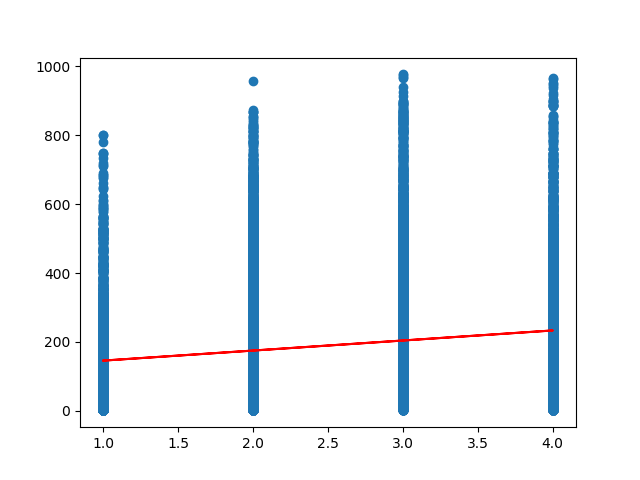

Mean squeared error:  31856.52518338213
R2 score:  0.03170384333577492


In [96]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x[:,0].reshape(x.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


<IPython.core.display.Javascript object>


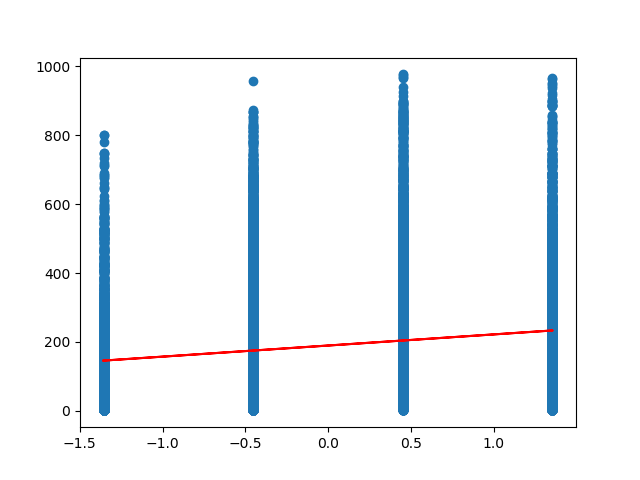

Mean squeared error:  31856.52518338213
R2 score:  0.03170384333577492


In [102]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x_t[:,0].reshape(x_t.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x_t[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


In [75]:
#proves per mostrar tot l'array al fer un print
import sys
np.set_printoptions(threshold=sys.maxsize)
print(x)

[['2011-01-01' 1 0 1 0 0 6 0 1 0.24 0.2879 0.81 0.0 3 13]
 ['2011-01-01' 1 0 1 1 0 6 0 1 0.22 0.2727 0.8 0.0 8 32]
 ['2011-01-01' 1 0 1 2 0 6 0 1 0.22 0.2727 0.8 0.0 5 27]
 ['2011-01-01' 1 0 1 3 0 6 0 1 0.24 0.2879 0.75 0.0 3 10]
 ['2011-01-01' 1 0 1 4 0 6 0 1 0.24 0.2879 0.75 0.0 0 1]
 ['2011-01-01' 1 0 1 5 0 6 0 2 0.24 0.2576 0.75 0.0896 0 1]
 ['2011-01-01' 1 0 1 6 0 6 0 1 0.22 0.2727 0.8 0.0 2 0]
 ['2011-01-01' 1 0 1 7 0 6 0 1 0.2 0.2576 0.86 0.0 1 2]
 ['2011-01-01' 1 0 1 8 0 6 0 1 0.24 0.2879 0.75 0.0 1 7]
 ['2011-01-01' 1 0 1 9 0 6 0 1 0.32 0.3485 0.76 0.0 8 6]
 ['2011-01-01' 1 0 1 10 0 6 0 1 0.38 0.3939 0.76 0.2537 12 24]
 ['2011-01-01' 1 0 1 11 0 6 0 1 0.36 0.3333 0.81 0.2836 26 30]
 ['2011-01-01' 1 0 1 12 0 6 0 1 0.42 0.4242 0.77 0.2836 29 55]
 ['2011-01-01' 1 0 1 13 0 6 0 2 0.46 0.4545 0.72 0.2985 47 47]
 ['2011-01-01' 1 0 1 14 0 6 0 2 0.46 0.4545 0.72 0.2836 35 71]
 ['2011-01-01' 1 0 1 15 0 6 0 2 0.44 0.4394 0.77 0.2985 40 70]
 ['2011-01-01' 1 0 1 16 0 6 0 2 0.42 0.4242 0.82 

In [84]:
#torno a posar el valor default a les opcions de print perquè si no és una locura
np.set_printoptions(threshold=8)